In [2]:
import numpy as np # Importing NumPy for linear algebra operations
import pandas as pd # Importing pandas for data processing and CSV file I/O
import os # Importing os for interacting with the operating system
import shutil # Importing shutil for high-level file operations
import matplotlib.pyplot as plt # Importing matplotlib for plotting
import librosa # Importing librosa for audio processing
import librosa.display # Importing librosa.display for visualizing audio data
import IPython.display as ipd # Importing IPython display for handling audio playback in notebooks

# Output directory to clear
output_dir = "op" # Directory path where combined audio files will be stored

# Clear the contents of the output directory
shutil.rmtree(output_dir, ignore_errors=True) # Remove the output directory and its contents if it exists
os.makedirs(output_dir, exist_ok=True) # Recreate the output directory

print(f"Contents of {output_dir} cleared.") # Print confirmation that the directory has been cleared

import librosa # Re-importing librosa (redundant, but doesn't harm)
import soundfile as sf # Importing soundfile for reading and writing sound files

# Path to the dataset
dataset_path = "Downloads/16000_pcm_speeches" # Path to the folder containing audio datasets for each speaker

# Output directory to save the combined files
output_dir = "op" # Output directory for storing combined audio files

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True) # Ensure the output directory exists

# List of speaker folders
speaker_folders = [ # List of folder names for each speaker in the dataset
    "Benjamin_Netanyau",
    "Jens_Stoltenberg",
    "Julia_Gillard",
    "Magaret_Tarcher",
    "Nelson_Mandela"
]

# Number of files to combine for each speaker
num_files_to_combine = 120 # Number of individual audio files to combine for each speaker

# Iterate over each speaker's folder
for speaker_folder in speaker_folders: # Loop through each speaker's folder in the speaker_folders list
    speaker_folder_path = os.path.join(dataset_path, speaker_folder) # Create the full path to the current speaker's folder

    # List the first num_files_to_combine WAV files in the speaker's folder
    wav_files = [f"{i}.wav" for i in range(num_files_to_combine)] # Generate a list of filenames (e.g., "0.wav", "1.wav", etc.)

    # Combine all WAV files into a single long file
    combined_audio = [] # Initialize an empty list to store audio data
    for wav_file in wav_files: # Loop through each WAV file in the current speaker's folder
        wav_file_path = os.path.join(speaker_folder_path, wav_file) # Create the full path to the current WAV file
        audio, sr = librosa.load(wav_file_path, sr=None) # Load the audio data and sampling rate from the WAV file
        combined_audio.extend(audio) # Append the audio data to the combined_audio list

    # Save the combined audio file
    output_file_path = os.path.join(output_dir, f"{speaker_folder}_combined.wav") # Create the path for the combined output file
    sf.write(output_file_path, combined_audio, sr) # Write the combined audio data to a new WAV file

print("Combination complete. Combined files saved in:", output_dir) # Print a confirmation message after combining all files


Contents of op cleared.
Combination complete. Combined files saved in: op


In [3]:
import tensorflow as tf # Importing TensorFlow for deep learning tasks
from sklearn.model_selection import train_test_split # Importing function to split data into training and test sets
from sklearn.preprocessing import LabelEncoder # Importing label encoder to convert labels to numerical form
from sklearn.preprocessing import StandardScaler # Importing StandardScaler to normalize features

# Set the parent directory for speaker folders
parent_dir = "Downloads/16000_pcm_speeches" # Directory containing folders for each speaker's audio files

# List of speaker folders
speaker_folders = [ # List of speaker names corresponding to folders in the parent directory
    "Benjamin_Netanyau",
    "Jens_Stoltenberg",
    "Julia_Gillard",
    "Magaret_Tarcher",
    "Nelson_Mandela"
]

# Function to extract features from audio files and associate them with labels
def extract_features(parent_dir, speaker_folders):
    features = [] # Initialize an empty list to store extracted features
    labels = [] # Initialize an empty list to store labels corresponding to features

    # Loop through each speaker's folder
    for i, speaker_folder in enumerate(speaker_folders):
        speaker_folder_path = os.path.join(parent_dir, speaker_folder) # Create full path to the speaker's folder

        # Loop through each file in the speaker's folder
        for filename in os.listdir(speaker_folder_path):
            if filename.endswith(".wav"): # Check if the file is a WAV file
                file_path = os.path.join(speaker_folder_path, filename) # Create full path to the WAV file
                audio, sr = librosa.load(file_path, sr=None, duration=1) # Load the audio file with a specific duration (1 second)
                mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13) # Extract 13 Mel-frequency cepstral coefficients (MFCCs)

                # Normalize MFCC features
                mfccs = StandardScaler().fit_transform(mfccs) # Standardize the MFCCs to have zero mean and unit variance
                features.append(mfccs.T) # Transpose MFCCs and add to features list
                labels.append(i) # Append the label index corresponding to the speaker

    return np.array(features), np.array(labels) # Convert lists to numpy arrays and return them

# Extract features and labels from the dataset
X, y = extract_features(parent_dir, speaker_folders) # Call the function to extract features and labels

# Print the first few features
for feature in X[:1]: # Loop through the first element in the features array
    print(feature) # Print the feature

from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping callback for training
from sklearn.preprocessing import LabelEncoder # Re-importing LabelEncoder (redundant, but doesn't harm)

# Encode labels with explicit classes
label_encoder = LabelEncoder() # Create an instance of LabelEncoder
y = label_encoder.fit_transform(y) # Transform the labels into a numerical format
label_encoder.classes_ = np.array(speaker_folders) # Explicitly set the classes to match the speaker folders

# Split the data into training, validation, and test sets
#X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) # Split into training and temp sets (commented out)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # Split temp set into validation and test sets (commented out)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split into training and test sets with 80-20 split

# Print the shapes of training and test data
print("Training Data Shape:", X_train.shape) # Print the shape of the training data
print("Test Data Shape:", X_test.shape) # Print the shape of the test data
#print("Validation Data Shape:", X_val.shape) # Print the shape of the validation data (commented out)


[[-3.46410155e+00  2.88717210e-01  2.88714826e-01  2.88710833e-01
   2.88705289e-01  2.88698137e-01  2.88689405e-01  2.88679123e-01
   2.88667232e-01  2.88653851e-01  2.88638890e-01  2.88622409e-01
   2.88604409e-01]
 [-3.46410155e+00  2.88697690e-01  2.88696378e-01  2.88694263e-01
   2.88691312e-01  2.88687497e-01  2.88682818e-01  2.88677305e-01
   2.88670957e-01  2.88663775e-01  2.88655698e-01  2.88646817e-01
   2.88637102e-01]
 [-3.46410179e+00  2.88694620e-01  2.88693517e-01  2.88691700e-01
   2.88689107e-01  2.88685828e-01  2.88681775e-01  2.88677037e-01
   2.88671494e-01  2.88665295e-01  2.88658351e-01  2.88650692e-01
   2.88642257e-01]
 [-3.41496515e+00  4.01689023e-01 -5.24658822e-02  6.99484289e-01
   2.78740406e-01  2.13533744e-01  3.30969393e-01  3.79182965e-01
   6.90628961e-02  2.89402425e-01  2.54391849e-01  3.14149350e-01
   2.36824691e-01]
 [-3.32731915e+00  5.34021258e-01 -3.14830184e-01  9.45635557e-01
   3.05575788e-01  2.24249974e-01  2.92698741e-01  3.76336753e-01


Test Accuracy: 0.9713524317121919
Confusion Matrix:
[[304   4   0   2   0]
 [ 24 283   2   1   0]
 [  2   0 280   1   0]
 [  3   3   1 276   0]
 [  0   0   0   0 315]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       310
           1       0.98      0.91      0.94       310
           2       0.99      0.99      0.99       283
           3       0.99      0.98      0.98       283
           4       1.00      1.00      1.00       315

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



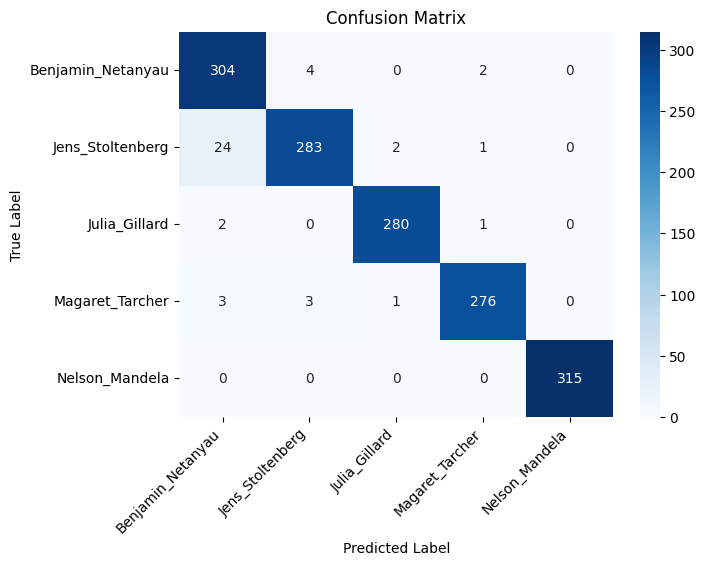

In [4]:
from sklearn.mixture import GaussianMixture # Import GaussianMixture model from sklearn for clustering
from sklearn.svm import SVC # Import Support Vector Classifier (SVC) from sklearn
from sklearn.model_selection import train_test_split # Import function to split data into training and test sets

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data (commented out)

# Train Gaussian Mixture Model (GMM)
#gmm = GaussianMixture(n_components=10, covariance_type='diag') # Initialize GMM with 10 components (commented out)
#gmm.fit(X_train, y_train) # Fit GMM on training data (commented out)

# Extract features using GMM
#X_train_features = gmm.predict_proba(X_train) # Predict probability features for training data (commented out)
#X_test_features = gmm.predict_proba(X_test) # Predict probability features for test data (commented out)

import numpy as np # Import numpy for numerical operations

# Flatten the input data
X_train_flat = X_train.reshape(X_train.shape[0], -1) # Reshape training data into 2D array (flattening)
X_test_flat = X_test.reshape(X_test.shape[0], -1) # Reshape test data into 2D array (flattening)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale') # Initialize SVM with RBF kernel, regularization parameter C, and gamma
svm_classifier.fit(X_train_flat, y_train) # Train the SVM classifier on the flattened training data

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import metrics for evaluation

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_flat) # Predict labels for the flattened test data using the trained SVM classifier

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) # Compute accuracy of the predictions
print("Test Accuracy:", accuracy) # Print the test accuracy

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred) # Compute the confusion matrix for the predictions
print("Confusion Matrix:") # Print a label for the confusion matrix
print(confusion_mat) # Print the confusion matrix

# Generate classification report
class_report = classification_report(y_test, y_pred) # Generate a classification report including precision, recall, and F1-score
print("Classification Report:") # Print a label for the classification report
print(class_report) # Print the classification report

import seaborn as sns # Import seaborn for creating visualizations

# Plot the confusion matrix
plt.figure(figsize=(7, 5)) # Create a figure with a specified size
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=speaker_folders, yticklabels=speaker_folders) # Plot a heatmap of the confusion matrix with annotations

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha="right") # Rotate the x-axis labels by 45 degrees for better readability

plt.title("Confusion Matrix") # Set the title of the plot
plt.xlabel("Predicted Label") # Label the x-axis as "Predicted Label"
plt.ylabel("True Label") # Label the y-axis as "True Label"
plt.show() # Display the plot


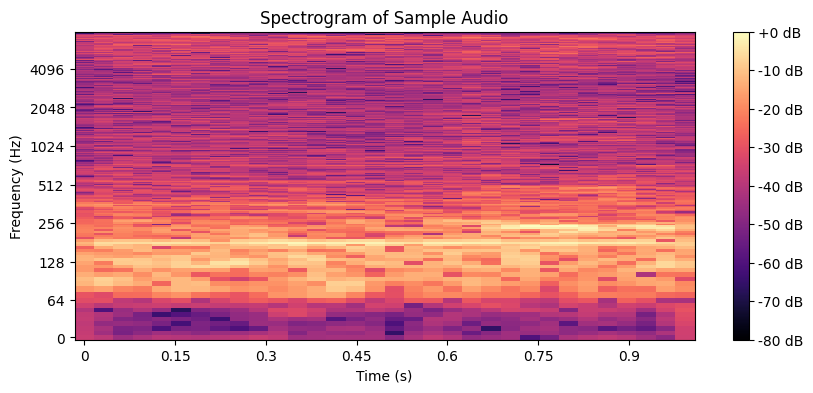

Zero Crossing Rate: [[0.11279297 0.16699219 0.24023438 0.23339844 0.24414062 0.26123047
  0.23242188 0.21142578 0.20605469 0.17382812 0.16699219 0.17138672
  0.17236328 0.171875   0.17382812 0.20361328 0.20556641 0.21337891
  0.25585938 0.24658203 0.22851562 0.22558594 0.17871094 0.16357422
  0.15527344 0.16162109 0.1796875  0.18164062 0.19921875 0.18945312
  0.14599609 0.09912109]]


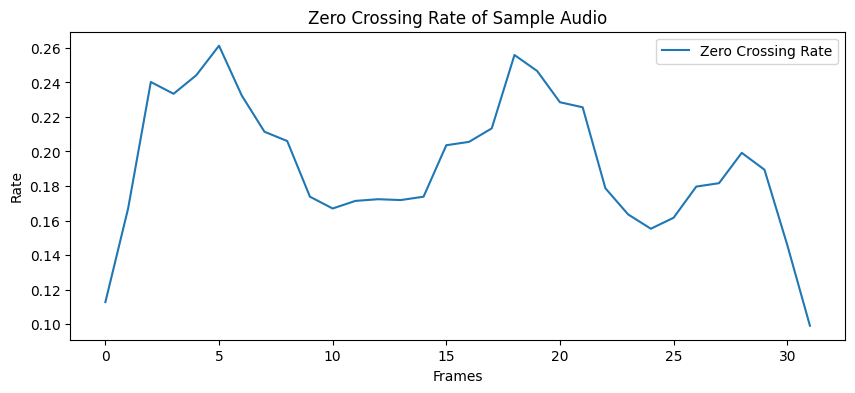

In [5]:
# Display the spectrogram of the sample
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Sample Audio')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

# Calculate and display the Zero Crossing Rate (ZCR) of the sample
zcr = librosa.feature.zero_crossing_rate(audio)
print("Zero Crossing Rate:", zcr)

# Plot Zero Crossing Rate
plt.figure(figsize=(10, 4))
plt.plot(zcr[0], label='Zero Crossing Rate')
plt.xlabel('Frames')
plt.ylabel('Rate')
plt.title('Zero Crossing Rate of Sample Audio')
plt.legend()
plt.show()
